In [249]:
from sqlalchemy import create_engine
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or retina
%matplotlib inline

sns.set(context='notebook', 
    style='whitegrid', 
    font_scale=1.1)

In [3]:
engine = create_engine("sqlite:///mta_data.db")

Checking the number of rows. 

In [4]:
rows_num = pd.read_sql('SELECT COUNT(*) FROM mta_data;', engine)
rows_num

,COUNT(*)
0,3554428


Taking a quick view of the data

In [5]:
pd.read_sql('SELECT * FROM mta_data LIMIT 10;', engine)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/22/2021,00:00:00,REGULAR,7575503,2588978
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/22/2021,04:00:00,RECOVR AUD,7575515,2588982
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/22/2021,08:00:00,REGULAR,7575523,2588989
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/22/2021,12:00:00,REGULAR,7575557,2588996
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/22/2021,16:00:00,REGULAR,7575630,2589008
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/22/2021,20:00:00,REGULAR,7575643,2589012
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/23/2021,00:00:00,REGULAR,7575643,2589013
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/23/2021,08:00:00,REGULAR,7575644,2589015
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/23/2021,12:00:00,REGULAR,7575645,2589015
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/23/2021,16:00:00,REGULAR,7575645,2589015


Checking the range of dates in the db. 

In [6]:
oldest_record = pd.read_sql('SELECT DATE FROM mta_data ORDER BY DATE LIMIT 1;' , engine)
print(oldest_record)

         DATE
0  01/30/2021


In [7]:
newest_record = pd.read_sql('SELECT DATE FROM mta_data ORDER BY DATE DESC LIMIT 1;' , engine)
print(newest_record)

         DATE
0  05/28/2021


So, we can see that we are working with about 4 months of data. 

Checking the amount of stations that are in the dataset

In [8]:
stations_num = pd.read_sql('SELECT COUNT(DISTINCT STATION) Number_of_Stations FROM mta_data;', engine)
stations_num

,Number_of_Stations
0,379


Now, checking the stations where the biggest amount of trains converge. 

In [9]:
pd.read_sql('SELECT STATION, length(LINENAME) Number_of_trains FROM mta_data GROUP BY STATION ORDER BY length (LINENAME) DESC LIMIT 10;', engine)

,STATION,Number_of_trains
0,TIMES SQ-42 ST,12
1,42 ST-PORT AUTH,12
2,ATL AV-BARCLAY,9
3,FULTON ST,8
4,34 ST-HERALD SQ,8
5,14 ST-UNION SQ,8
6,W 4 ST-WASH SQ,7
7,CANAL ST,7
8,59 ST,7
9,6 AV,6


Digging a little bit with the data from TIMES SQ-42 ST. 
Checking the number of unique turnstiles there are in the station by grouping C/A, UNIT and SCP. 

In [10]:
pd.read_sql('SELECT * FROM mta_data WHERE STATION = "TIMES SQ-42 ST" GROUP BY "C/A", UNIT, SCP  LIMIT 50;', engine)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,05/22/2021,00:00:00,REGULAR,9979156,12512171
1,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,05/22/2021,00:00:00,REGULAR,4174343,4888505
2,A021,R032,01-00-02,TIMES SQ-42 ST,ACENQRS1237W,BMT,05/22/2021,00:00:00,REGULAR,2927008,2855143
3,A021,R032,01-00-03,TIMES SQ-42 ST,ACENQRS1237W,BMT,05/22/2021,00:00:00,REGULAR,2885096,1365596
4,A021,R032,01-00-04,TIMES SQ-42 ST,ACENQRS1237W,BMT,05/22/2021,00:00:00,REGULAR,2593100,3807100
5,A021,R032,01-00-05,TIMES SQ-42 ST,ACENQRS1237W,BMT,05/22/2021,00:00:00,REGULAR,1977399,6438787
6,A021,R032,01-00-06,TIMES SQ-42 ST,ACENQRS1237W,BMT,05/22/2021,00:00:00,REGULAR,2255288,7001509
7,A021,R032,01-00-07,TIMES SQ-42 ST,ACENQRS1237W,BMT,05/22/2021,00:00:00,REGULAR,3707262,6399079
8,R143,R032,02-00-00,TIMES SQ-42 ST,1237ACENQRSW,IRT,05/22/2021,00:00:00,REGULAR,3134269,5917004
9,R143,R032,02-00-01,TIMES SQ-42 ST,1237ACENQRSW,IRT,05/22/2021,00:00:00,REGULAR,472847,872239


From the previous analysis and based on the information provided by the MTA, we see there are 41 turnstiles. 

Now, we will find the extreme values (min and max) in the ENTRIES column and do a little bit of exploration of those specific turnstiles. 

In [11]:
pd.read_sql('SELECT * FROM mta_data WHERE STATION = "TIMES SQ-42 ST" GROUP BY "C/A", UNIT, SCP ORDER BY MAX(ENTRIES) DESC LIMIT 1;', engine)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,R151,R033,00-00-01,TIMES SQ-42 ST,1237ACENQRSW,IRT,05/28/2021,20:00:00,REGULAR,1720207404,320588043


We will evaluate the behaviour of the turnstile associated to the 'max' number of entries for a week. 

In [12]:
df_eda = pd.read_sql('SELECT * FROM mta_data WHERE STATION = "TIMES SQ-42 ST" AND "C/A" = "R151" AND UNIT = "R033" AND SCP = "00-00-01" GROUP BY DATE LIMIT 8;', engine)
df_eda

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,R151,R033,00-00-01,TIMES SQ-42 ST,1237ACENQRSW,IRT,01/30/2021,03:00:00,REGULAR,1720117438,320568627
1,R151,R033,00-00-01,TIMES SQ-42 ST,1237ACENQRSW,IRT,01/31/2021,03:00:00,REGULAR,1720117904,320568737
2,R151,R033,00-00-01,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/01/2021,03:00:00,REGULAR,1720118232,320568805
3,R151,R033,00-00-01,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/02/2021,03:00:00,REGULAR,1720118509,320568854
4,R151,R033,00-00-01,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/03/2021,03:00:00,REGULAR,1720118932,320568918
5,R151,R033,00-00-01,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/04/2021,03:00:00,REGULAR,1720119586,320569044
6,R151,R033,00-00-01,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/05/2021,03:00:00,REGULAR,1720120299,320569163
7,R151,R033,00-00-01,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/06/2021,03:00:00,REGULAR,1720120997,320569264


Now, we will get the number of total entries and exits in the period time of 1 week.

Entries

In [13]:
final_count = df_eda.iloc[7, 9]
initial_count = df_eda.iloc[0, 9]
total_entries = final_count - initial_count
print(total_entries)

3559


Exits

In [14]:
final_count = df_eda.iloc[7, 10]
initial_count = df_eda.iloc[0, 10]
total_exits = final_count - initial_count
print(total_exits)

637


We will evaluate the behaviour of the turnstile associated to the 'min' number of entries for a week. 

In [15]:
pd.read_sql('SELECT * FROM mta_data WHERE STATION = "TIMES SQ-42 ST" GROUP BY "C/A", UNIT, SCP ORDER BY MAX(ENTRIES) LIMIT 1;', engine)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,R147,R033,04-05-01,TIMES SQ-42 ST,1237ACENQRS,IRT,05/22/2021,00:00:00,REGULAR,10,1324


In [16]:
df_eda2 = pd.read_sql('SELECT * FROM mta_data WHERE STATION = "TIMES SQ-42 ST" AND "C/A" = "R147" AND UNIT = "R033" AND SCP = "04-05-01" GROUP BY DATE LIMIT 8;', engine)
df_eda2

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,R147,R033,04-05-01,TIMES SQ-42 ST,1237ACENQRS,IRT,01/30/2021,03:00:00,REGULAR,10,1303
1,R147,R033,04-05-01,TIMES SQ-42 ST,1237ACENQRS,IRT,01/31/2021,03:00:00,REGULAR,10,1303
2,R147,R033,04-05-01,TIMES SQ-42 ST,1237ACENQRS,IRT,02/01/2021,03:00:00,REGULAR,10,1303
3,R147,R033,04-05-01,TIMES SQ-42 ST,1237ACENQRS,IRT,02/02/2021,03:00:00,REGULAR,10,1303
4,R147,R033,04-05-01,TIMES SQ-42 ST,1237ACENQRS,IRT,02/03/2021,03:00:00,REGULAR,10,1303
5,R147,R033,04-05-01,TIMES SQ-42 ST,1237ACENQRS,IRT,02/04/2021,07:00:00,REGULAR,10,1304
6,R147,R033,04-05-01,TIMES SQ-42 ST,1237ACENQRS,IRT,02/05/2021,03:00:00,REGULAR,10,1304
7,R147,R033,04-05-01,TIMES SQ-42 ST,1237ACENQRS,IRT,02/06/2021,03:00:00,REGULAR,10,1304


We can see that this specific turnstile may have been broken because it didn't recorded any new entry in one week.

Now, we will begin to work with the data uniquely with Python. 

In [17]:
df = pd.read_sql('SELECT * FROM mta_data;', engine)

Getting some basic info of the data in a broader sense

In [18]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [19]:
df.shape

(3554428, 11)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554428 entries, 0 to 3554427
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 298.3+ MB


In [21]:
df.describe()

,ENTRIES,EXITS
count,3.554428e+06,3.554428e+06
mean,4.202365e+07,3.377615e+07
std,2.185650e+08,1.937409e+08
min,0.000000e+00,0.000000e+00
25%,2.203272e+05,9.312875e+04
50%,1.469502e+06,8.818340e+05
75%,6.142063e+06,4.040075e+06
max,2.147432e+09,2.123039e+09


We will create a new column that will contain the unique identifier of a turnstile

In [22]:
df['t_unique'] = df['C/A'] + ' ' + df['UNIT'] + ' ' + df['SCP'] + ' ' + df['STATION']

We will also create the DATE_TIME column

In [23]:
df['DT'] = pd.to_datetime(df['DATE'] + " " + df['TIME'])

In [24]:
df.sample(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,t_unique,DT
819994,R529,R208,00-06-00,103 ST-CORONA,7,IRT,05/06/2021,20:00:00,REGULAR,4604013,11955326,R529 R208 00-06-00 103 ST-CORONA,2021-05-06 20:00:00
2089974,R728,R226,00-03-00,GUN HILL RD,5,IRT,03/22/2021,12:00:00,REGULAR,5643540,6568278,R728 R226 00-03-00 GUN HILL RD,2021-03-22 12:00:00
758799,R106,R305,01-00-03,WTC-CORTLANDT,1,IRT,05/02/2021,01:00:00,REGULAR,76,68,R106 R305 01-00-03 WTC-CORTLANDT,2021-05-02 01:00:00
2924601,R646,R110,01-00-00,FLATBUSH AV-B.C,25,IRT,02/26/2021,04:00:00,REGULAR,3800467,2412399,R646 R110 01-00-00 FLATBUSH AV-B.C,2021-02-26 04:00:00
1799210,PTH17,R541,01-00-04,THIRTY THIRD ST,1,PTH,04/02/2021,19:21:43,REGULAR,39745,31055,PTH17 R541 01-00-04 THIRTY THIRD ST,2021-04-02 19:21:43


Let's study the entire file to look for duplicated values, in case we find then, remove them. 


In [25]:
(df
 .groupby(["t_unique", "DATE" , "TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)

,t_unique,DATE,TIME,ENTRIES
2390529,R145 R032 00-00-02 TIMES SQ-42 ST,02/02/2021,07:00:00,2
3107321,R417 R222 00-03-01 PARKCHESTER,03/26/2021,05:00:00,2
1089771,N100 R252 00-00-00 HIGH ST,03/09/2021,07:00:00,2
1089772,N100 R252 00-00-00 HIGH ST,03/09/2021,11:00:00,2
1089773,N100 R252 00-00-00 HIGH ST,03/09/2021,15:00:00,2
301779,B024 R211 00-05-00 KINGS HWY,05/03/2021,08:00:00,2
301780,B024 R211 00-05-00 KINGS HWY,05/03/2021,12:00:00,2
301781,B024 R211 00-05-00 KINGS HWY,05/03/2021,16:00:00,2
301782,B024 R211 00-05-00 KINGS HWY,05/03/2021,20:00:00,2
301783,B024 R211 00-05-00 KINGS HWY,05/04/2021,00:00:00,2


Let's take a closer look at one of the cases.

In [26]:
val = 'N100 R252 00-00-00 HIGH ST'
val2 = '03/09/2021'

In [27]:
df[(df['t_unique'] == val) & (df['DATE'] == val2 )].head(7)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,t_unique,DT
2363565,N100,R252,00-00-00,HIGH ST,AC,IND,03/09/2021,03:00:00,REGULAR,818043,1730673,N100 R252 00-00-00 HIGH ST,2021-03-09 03:00:00
2363566,N100,R252,00-00-00,HIGH ST,AC,IND,03/09/2021,03:00:00,RECOVR AUD,818272,1731687,N100 R252 00-00-00 HIGH ST,2021-03-09 03:00:00
2363567,N100,R252,00-00-00,HIGH ST,AC,IND,03/09/2021,07:00:00,REGULAR,818050,1730744,N100 R252 00-00-00 HIGH ST,2021-03-09 07:00:00
2363568,N100,R252,00-00-00,HIGH ST,AC,IND,03/09/2021,07:00:00,RECOVR AUD,818272,1731687,N100 R252 00-00-00 HIGH ST,2021-03-09 07:00:00
2363569,N100,R252,00-00-00,HIGH ST,AC,IND,03/09/2021,11:00:00,REGULAR,818117,1731066,N100 R252 00-00-00 HIGH ST,2021-03-09 11:00:00
2363570,N100,R252,00-00-00,HIGH ST,AC,IND,03/09/2021,11:00:00,RECOVR AUD,818272,1731687,N100 R252 00-00-00 HIGH ST,2021-03-09 11:00:00
2363571,N100,R252,00-00-00,HIGH ST,AC,IND,03/09/2021,15:00:00,REGULAR,818211,1731234,N100 R252 00-00-00 HIGH ST,2021-03-09 15:00:00


From this case, we can see that when the 'RECOVR AUD' is right after a 'REGULAR' record, the value does not 
have real significance, but let's study one more case

In [28]:
val = 'R145 R032 00-00-02 TIMES SQ-42 ST'
val2 = '02/02/2021'

In [29]:
df[(df['t_unique'] == val) & (df['DATE'] == val2 )].head(7)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,t_unique,DT
3485935,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/02/2021,03:00:00,REGULAR,6196233,2790793,R145 R032 00-00-02 TIMES SQ-42 ST,2021-02-02 03:00:00
3485936,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/02/2021,03:00:00,RECOVR AUD,859721,974999,R145 R032 00-00-02 TIMES SQ-42 ST,2021-02-02 03:00:00
3485937,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/02/2021,07:00:00,REGULAR,6196244,2790797,R145 R032 00-00-02 TIMES SQ-42 ST,2021-02-02 07:00:00
3485938,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/02/2021,07:00:00,RECOVR AUD,859723,975017,R145 R032 00-00-02 TIMES SQ-42 ST,2021-02-02 07:00:00
3485939,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/02/2021,11:00:00,REGULAR,6196266,2790822,R145 R032 00-00-02 TIMES SQ-42 ST,2021-02-02 11:00:00
3485940,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/02/2021,11:00:00,RECOVR AUD,859736,975163,R145 R032 00-00-02 TIMES SQ-42 ST,2021-02-02 11:00:00
3485941,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/02/2021,15:00:00,REGULAR,6196297,2790836,R145 R032 00-00-02 TIMES SQ-42 ST,2021-02-02 15:00:00


Here, we confirm that the RECOVR AUD is unnecessary when the 't_unique' and 'DT' are duplicated. 
So, we will proceed to remove then

In [30]:
df.shape

(3554428, 13)

In [468]:
df[df.t_unique == 'N506 R022 00-05-05 34 ST-HERALD SQ'].head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,t_unique,DT,EN_DIFF,EX_DIFF
3446287,N506,R022,00-05-05,34 ST-HERALD SQ,BDFMNQRW,IND,01/30/2021,07:00:00,REGULAR,2249075,2213739,N506 R022 00-05-05 34 ST-HERALD SQ,2021-01-30 07:00:00,19.0,60.0
3446288,N506,R022,00-05-05,34 ST-HERALD SQ,BDFMNQRW,IND,01/30/2021,11:00:00,REGULAR,2249169,2214027,N506 R022 00-05-05 34 ST-HERALD SQ,2021-01-30 11:00:00,94.0,288.0


In [31]:

df.sort_values(["t_unique", "DT"], inplace=True, ascending=False)
df.drop_duplicates(subset=["t_unique", "DT"], inplace=True)
print(df.shape)

(3554321, 13)


Repeting the process to check for duplicated entries

In [32]:
(df
 .groupby(["t_unique", "DATE" , "TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,t_unique,DATE,TIME,ENTRIES
0,A002 R051 02-00-00 59 ST,01/30/2021,03:00:00,1
2369552,R138 R293 00-05-01 34 ST-PENN STA,04/17/2021,18:00:00,1
2369541,R138 R293 00-05-01 34 ST-PENN STA,04/15/2021,22:00:00,1
2369542,R138 R293 00-05-01 34 ST-PENN STA,04/16/2021,02:00:00,1
2369543,R138 R293 00-05-01 34 ST-PENN STA,04/16/2021,06:00:00,1


In [33]:
df.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,t_unique,DT
208911,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,21:00:00,REGULAR,5554,577,TRAM2 R469 00-05-01 RIT-ROOSEVELT,2021-05-28 21:00:00
208910,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,17:00:00,REGULAR,5554,577,TRAM2 R469 00-05-01 RIT-ROOSEVELT,2021-05-28 17:00:00
208909,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,13:00:00,REGULAR,5554,577,TRAM2 R469 00-05-01 RIT-ROOSEVELT,2021-05-28 13:00:00
208908,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,09:00:00,REGULAR,5554,577,TRAM2 R469 00-05-01 RIT-ROOSEVELT,2021-05-28 09:00:00
208907,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,08:20:35,REGULAR,5554,577,TRAM2 R469 00-05-01 RIT-ROOSEVELT,2021-05-28 08:20:35


As we can see, now the df is sorted in a descending format (by date), but we will change it back to ascending. 

In [34]:
df.sort_values(["t_unique", "DT"], inplace=True, ascending=True)

In [35]:
df.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,t_unique,DT
3345349,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,03:00:00,REGULAR,7524539,2564693,A002 R051 02-00-00 59 ST,2021-01-30 03:00:00
3345350,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,07:00:00,REGULAR,7524543,2564703,A002 R051 02-00-00 59 ST,2021-01-30 07:00:00
3345351,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,11:00:00,REGULAR,7524566,2564755,A002 R051 02-00-00 59 ST,2021-01-30 11:00:00
3345352,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,15:00:00,RECOVR AUD,7524643,2564793,A002 R051 02-00-00 59 ST,2021-01-30 15:00:00
3345353,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,19:00:00,REGULAR,7524739,2564811,A002 R051 02-00-00 59 ST,2021-01-30 19:00:00


Now, we gonna start calculating the differences in the values between time frames for each turnstile. 
To do that, we will create a new data frame holding the turnstiles grouped. 

In [36]:
grouped_t = df.groupby(['t_unique'])
grouped_t.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,t_unique,DT
3345349,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,03:00:00,REGULAR,7524539,2564693,A002 R051 02-00-00 59 ST,2021-01-30 03:00:00
3345350,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,07:00:00,REGULAR,7524543,2564703,A002 R051 02-00-00 59 ST,2021-01-30 07:00:00
3345351,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,11:00:00,REGULAR,7524566,2564755,A002 R051 02-00-00 59 ST,2021-01-30 11:00:00
3345352,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,15:00:00,RECOVR AUD,7524643,2564793,A002 R051 02-00-00 59 ST,2021-01-30 15:00:00
3345353,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,19:00:00,REGULAR,7524739,2564811,A002 R051 02-00-00 59 ST,2021-01-30 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554391,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/30/2021,20:00:00,REGULAR,5554,544,TRAM2 R469 00-05-01 RIT-ROOSEVELT,2021-01-30 20:00:00
3554392,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/31/2021,00:00:00,REGULAR,5554,544,TRAM2 R469 00-05-01 RIT-ROOSEVELT,2021-01-31 00:00:00
3554393,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/31/2021,04:00:00,REGULAR,5554,544,TRAM2 R469 00-05-01 RIT-ROOSEVELT,2021-01-31 04:00:00
3554394,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/31/2021,08:00:00,REGULAR,5554,544,TRAM2 R469 00-05-01 RIT-ROOSEVELT,2021-01-31 08:00:00


Now, creating new columns to hold the differences

In [37]:
df['EN_DIFF'] = grouped_t['ENTRIES'].transform(pd.Series.diff)
df['EX_DIFF'] = grouped_t['EXITS'].transform(pd.Series.diff)

In [38]:
df.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,t_unique,DT,EN_DIFF,EX_DIFF
3345349,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,03:00:00,REGULAR,7524539,2564693,A002 R051 02-00-00 59 ST,2021-01-30 03:00:00,NaN,NaN
3345350,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,07:00:00,REGULAR,7524543,2564703,A002 R051 02-00-00 59 ST,2021-01-30 07:00:00,4.0,10.0
3345351,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,11:00:00,REGULAR,7524566,2564755,A002 R051 02-00-00 59 ST,2021-01-30 11:00:00,23.0,52.0
3345352,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,15:00:00,RECOVR AUD,7524643,2564793,A002 R051 02-00-00 59 ST,2021-01-30 15:00:00,77.0,38.0
3345353,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,19:00:00,REGULAR,7524739,2564811,A002 R051 02-00-00 59 ST,2021-01-30 19:00:00,96.0,18.0


Dropping the NaN

In [39]:
df.dropna(inplace=True)

We will perform some observations on the new columns 'EN_DIFF' and 'EX_DIFF'. 
First thing to check, values should always be positive due to the fact that entries and exits are cumulative.

In [40]:
print('Description of EN_DIFF:')
print(df['EN_DIFF'].describe(), '\n')
print('Description of EX_DIFF:')
print(df['EX_DIFF'].describe())

Description of EN_DIFF:
count    3.549262e+06
mean    -7.987307e+02
std      2.353264e+06
min     -1.604324e+09
25%      2.000000e+00
50%      1.900000e+01
75%      6.700000e+01
max      2.139010e+09
Name: EN_DIFF, dtype: float64 

Description of EX_DIFF:
count    3.549262e+06
mean    -6.918235e+02
std      2.279382e+06
min     -1.804896e+09
25%      3.000000e+00
50%      2.100000e+01
75%      6.700000e+01
max      2.005378e+09
Name: EX_DIFF, dtype: float64


We must have a significant amount of negative differences because even our means are negative in the order of the hundreds. 

Let's see in how many cases we have a negative value for EN_DIFF and EX_DIFF

In [41]:
print('For EN_DIFF: {}'. format(len(df['EN_DIFF'][df['EN_DIFF']<0])))
print('For EX_DIFF: {}'. format(len(df['EX_DIFF'][df['EX_DIFF']<0])))

For EN_DIFF: 29936
For EX_DIFF: 21664


In [42]:
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,t_unique,DT,EN_DIFF,EX_DIFF
3345350,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,07:00:00,REGULAR,7524543,2564703,A002 R051 02-00-00 59 ST,2021-01-30 07:00:00,4.0,10.0
3345351,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,11:00:00,REGULAR,7524566,2564755,A002 R051 02-00-00 59 ST,2021-01-30 11:00:00,23.0,52.0
3345352,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,15:00:00,RECOVR AUD,7524643,2564793,A002 R051 02-00-00 59 ST,2021-01-30 15:00:00,77.0,38.0
3345353,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,19:00:00,REGULAR,7524739,2564811,A002 R051 02-00-00 59 ST,2021-01-30 19:00:00,96.0,18.0
3345354,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,23:00:00,REGULAR,7524821,2564823,A002 R051 02-00-00 59 ST,2021-01-30 23:00:00,82.0,12.0
3345355,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/31/2021,03:00:00,REGULAR,7524826,2564825,A002 R051 02-00-00 59 ST,2021-01-31 03:00:00,5.0,2.0
3345356,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/31/2021,07:00:00,REGULAR,7524828,2564827,A002 R051 02-00-00 59 ST,2021-01-31 07:00:00,2.0,2.0
3345357,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/31/2021,11:00:00,REGULAR,7524851,2564858,A002 R051 02-00-00 59 ST,2021-01-31 11:00:00,23.0,31.0
3345358,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/31/2021,15:00:00,REGULAR,7524927,2564880,A002 R051 02-00-00 59 ST,2021-01-31 15:00:00,76.0,22.0
3345359,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/31/2021,19:00:00,REGULAR,7525027,2564905,A002 R051 02-00-00 59 ST,2021-01-31 19:00:00,100.0,25.0


We have approximately 30,000 values with negative EN_DIFF and almost 22000 with negative EX_DIFF, 
it may sound like a lot, but compared to the 3.5 millions of rows of data, we will consider that we can
annulate them by making those values 0. 

In [43]:
df['EN_DIFF'] = df['EN_DIFF'].apply(lambda x : x if x > 0 else 0)
df['EX_DIFF'] = df['EX_DIFF'].apply(lambda x : x if x > 0 else 0)

Verifiying that it worked

In [44]:
print('For EN_DIFF: {}'. format(len(df['EN_DIFF'][df['EN_DIFF']<0])))
print('For EX_DIFF: {}'. format(len(df['EX_DIFF'][df['EX_DIFF']<0])))

For EN_DIFF: 0
For EX_DIFF: 0


As we are seeing the data in intervals of 4 hours, that are 240 minutes, that are 14400 sec, 
and assuming that each person takes aproximmately 5 seconds to enter the turnstile, we will set
the limit for each individual count to be 2880, but when talking about exits, we will assume that 
every seconds, a person can go through, so the limit for exits will be 1440 every 4 hours. 

In [45]:
print(len(df['EN_DIFF'][df['EN_DIFF']>2880]))
print(len(df['EX_DIFF'][df['EN_DIFF']>2880]))

123
123


In [46]:
df['EN_DIFF'] = df['EN_DIFF'].apply(lambda x : x if x < 2880 else 0)
df['EX_DIFF'] = df['EX_DIFF'].apply(lambda x : x if x < 2880 else 0)

Verifing the results:

In [47]:
print(len(df['EN_DIFF'][df['EN_DIFF']>2880]))
print(len(df['EX_DIFF'][df['EN_DIFF']>2880]))

0
0


Now, we will check which are the most busy turnstiles and stations. For this, we will create a new dataframe where we will keep just the columns that we find appropiate.

In [48]:
df_1 = df[['t_unique', 'STATION', 'DATE', 'TIME', 'DT', 'EN_DIFF', 'EX_DIFF']].copy(deep=True)
df_1.head(5)

,t_unique,STATION,DATE,TIME,DT,EN_DIFF,EX_DIFF
3345350,A002 R051 02-00-00 59 ST,59 ST,01/30/2021,07:00:00,2021-01-30 07:00:00,4.0,10.0
3345351,A002 R051 02-00-00 59 ST,59 ST,01/30/2021,11:00:00,2021-01-30 11:00:00,23.0,52.0
3345352,A002 R051 02-00-00 59 ST,59 ST,01/30/2021,15:00:00,2021-01-30 15:00:00,77.0,38.0
3345353,A002 R051 02-00-00 59 ST,59 ST,01/30/2021,19:00:00,2021-01-30 19:00:00,96.0,18.0
3345354,A002 R051 02-00-00 59 ST,59 ST,01/30/2021,23:00:00,2021-01-30 23:00:00,82.0,12.0


Adding a new column to hold the total flow of people for each interval of time. 

In [49]:
df_1['Flow'] = df_1.apply(lambda row: row.EN_DIFF + row.EX_DIFF, axis=1)

In [50]:
df_1.head(5)

,t_unique,STATION,DATE,TIME,DT,EN_DIFF,EX_DIFF,Flow
3345350,A002 R051 02-00-00 59 ST,59 ST,01/30/2021,07:00:00,2021-01-30 07:00:00,4.0,10.0,14.0
3345351,A002 R051 02-00-00 59 ST,59 ST,01/30/2021,11:00:00,2021-01-30 11:00:00,23.0,52.0,75.0
3345352,A002 R051 02-00-00 59 ST,59 ST,01/30/2021,15:00:00,2021-01-30 15:00:00,77.0,38.0,115.0
3345353,A002 R051 02-00-00 59 ST,59 ST,01/30/2021,19:00:00,2021-01-30 19:00:00,96.0,18.0,114.0
3345354,A002 R051 02-00-00 59 ST,59 ST,01/30/2021,23:00:00,2021-01-30 23:00:00,82.0,12.0,94.0


Now, we will use the Flow column to determine the busiest turnstiles and stations. 
First, the top 10 turnstiles will be:

In [51]:
(df_1.sort_values(by = 'Flow', ascending = False , inplace=False)).head(10)

,t_unique,STATION,DATE,TIME,DT,EN_DIFF,EX_DIFF,Flow
2865552,R173 R159 00-00-00 116 ST-COLUMBIA,116 ST-COLUMBIA,02/20/2021,00:00:00,2021-02-20 00:00:00,1390.0,2270.0,3660.0
2413708,N606 R025 00-00-02 JAMAICA CENTER,JAMAICA CENTER,03/10/2021,15:00:00,2021-03-10 15:00:00,822.0,2465.0,3287.0
2413855,N606 R025 00-00-06 JAMAICA CENTER,JAMAICA CENTER,03/10/2021,15:00:00,2021-03-10 15:00:00,2494.0,676.0,3170.0
2865762,R173 R159 00-03-01 116 ST-COLUMBIA,116 ST-COLUMBIA,02/20/2021,00:00:00,2021-02-20 00:00:00,1822.0,985.0,2807.0
2413929,N606 R025 00-00-08 JAMAICA CENTER,JAMAICA CENTER,03/10/2021,15:00:00,2021-03-10 15:00:00,2273.0,473.0,2746.0
2737639,B032 R264 00-00-01 OCEAN PKWY,OCEAN PKWY,02/20/2021,03:00:00,2021-02-20 03:00:00,1695.0,1045.0,2740.0
539465,PTH06 R546 00-00-03 PAVONIA/NEWPORT,PAVONIA/NEWPORT,05/10/2021,09:10:33,2021-05-10 09:10:33,2716.0,0.0,2716.0
2413818,N606 R025 00-00-05 JAMAICA CENTER,JAMAICA CENTER,03/10/2021,15:00:00,2021-03-10 15:00:00,1915.0,758.0,2673.0
127649,PTH20 R549 03-00-08 NEWARK HM HE,NEWARK HM HE,05/28/2021,10:12:12,2021-05-28 10:12:12,2631.0,0.0,2631.0
3044940,PTH01 R549 00-00-08 NEWARK HW BMEBE,NEWARK HW BMEBE,02/19/2021,10:55:17,2021-02-19 10:55:17,0.0,2547.0,2547.0


Definetely this results don't make much sense, so, let's take a closer look and check the number of entries
and exits

In [52]:
df[(df.STATION == '116 ST-COLUMBIA') & (df.DATE == '02/20/2021')].head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,t_unique,DT,EN_DIFF,EX_DIFF
2865552,R173,R159,00-00-00,116 ST-COLUMBIA,1,IRT,02/20/2021,00:00:00,REGULAR,6039954,6844476,R173 R159 00-00-00 116 ST-COLUMBIA,2021-02-20 00:00:00,1390.0,2270.0
2865553,R173,R159,00-00-00,116 ST-COLUMBIA,1,IRT,02/20/2021,04:00:00,REGULAR,6039962,6844496,R173 R159 00-00-00 116 ST-COLUMBIA,2021-02-20 04:00:00,8.0,20.0
2865554,R173,R159,00-00-00,116 ST-COLUMBIA,1,IRT,02/20/2021,08:00:00,REGULAR,6039974,6844524,R173 R159 00-00-00 116 ST-COLUMBIA,2021-02-20 08:00:00,12.0,28.0
2865555,R173,R159,00-00-00,116 ST-COLUMBIA,1,IRT,02/20/2021,12:00:00,REGULAR,6040005,6844629,R173 R159 00-00-00 116 ST-COLUMBIA,2021-02-20 12:00:00,31.0,105.0
2865556,R173,R159,00-00-00,116 ST-COLUMBIA,1,IRT,02/20/2021,16:00:00,REGULAR,6040061,6844806,R173 R159 00-00-00 116 ST-COLUMBIA,2021-02-20 16:00:00,56.0,177.0


Let's see the day before

In [53]:
df[(df.STATION == '116 ST-COLUMBIA') & (df.DATE == '02/19/2021')].head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,t_unique,DT,EN_DIFF,EX_DIFF


In [54]:
df[(df.STATION == '116 ST-COLUMBIA') & (df.DATE == '02/18/2021')].head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,t_unique,DT,EN_DIFF,EX_DIFF


Let's see the data for the same turnstile for the day before from the original df

In [55]:
df[(df.t_unique == 'R173 R159 00-00-00 116 ST-COLUMBIA') & (df.DATE == '02/17/2021')].head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,t_unique,DT,EN_DIFF,EX_DIFF
3075151,R173,R159,00-00-00,116 ST-COLUMBIA,1,IRT,02/17/2021,00:00:00,REGULAR,6038564,6842206,R173 R159 00-00-00 116 ST-COLUMBIA,2021-02-17,58.0,57.0


# Here we switch to daily difference instead of every 4 hours difference and decided to include the exits too!

We can see that the problem is that for that specific turnstile, there are no records for the 19th nor 18th of february. As this may be the case for the other turnstiles that show this behaviour, we 
will focus our efforts in calculating the daily difference in the entries and NOT in the difference for each indivual 4 hours block period. 

In [178]:
t_daily = df.copy(deep=True)

In [179]:
t_daily.head(6)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,t_unique,DT,EN_DIFF,EX_DIFF
3345350,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,07:00:00,REGULAR,7524543,2564703,A002 R051 02-00-00 59 ST,2021-01-30 07:00:00,4.0,10.0
3345351,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,11:00:00,REGULAR,7524566,2564755,A002 R051 02-00-00 59 ST,2021-01-30 11:00:00,23.0,52.0
3345352,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,15:00:00,RECOVR AUD,7524643,2564793,A002 R051 02-00-00 59 ST,2021-01-30 15:00:00,77.0,38.0
3345353,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,19:00:00,REGULAR,7524739,2564811,A002 R051 02-00-00 59 ST,2021-01-30 19:00:00,96.0,18.0
3345354,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,23:00:00,REGULAR,7524821,2564823,A002 R051 02-00-00 59 ST,2021-01-30 23:00:00,82.0,12.0
3345355,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/31/2021,03:00:00,REGULAR,7524826,2564825,A002 R051 02-00-00 59 ST,2021-01-31 03:00:00,5.0,2.0


Dropping some columns to improve readibility. 

In [174]:
t_daily.drop(['DESC','LINENAME'] , axis=1, inplace=True, errors = 'ignore')

In [180]:
t_daily.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 't_unique', 'DT', 'EN_DIFF', 'EX_DIFF'],
      dtype='object')

# This is really important, here is where I calculate the difference in values using the last and first of the values for each turnstile, for each Date and Station. 

In [182]:
t_daily = df.groupby(['t_unique', 'DATE','STATION'], as_index=False).agg({'ENTRIES': ['first', 'last'],'EXITS': ['first','last']})
t_daily['daily_d'] = abs(t_daily['ENTRIES']['last'] - t_daily['ENTRIES']['first'])
t_daily['daily_ex'] = abs(t_daily['EXITS']['last'] - t_daily['EXITS']['first'])

In [183]:
t_daily.head(6)

t_unique        DATE STATION  ENTRIES             EXITS  \
                                                   first     last    first   
0  A002 R051 02-00-00 59 ST  01/30/2021   59 ST  7524543  7524821  2564703   
1  A002 R051 02-00-00 59 ST  01/31/2021   59 ST  7524826  7525089  2564825   
2  A002 R051 02-00-00 59 ST  02/01/2021   59 ST  7525092  7525260  2564916   
3  A002 R051 02-00-00 59 ST  02/02/2021   59 ST  7525267  7525600  2565034   
4  A002 R051 02-00-00 59 ST  02/03/2021   59 ST  7525606  7526164  2565214   
5  A002 R051 02-00-00 59 ST  02/04/2021   59 ST  7526176  7526683  2565489   

           daily_d daily_ex  
      last                   
0  2564823     278      120  
1  2564914     263       89  
2  2565032     168      116  
3  2565208     333      174  
4  2565484     558      270  
5  2565733     507      244

To come up with the number 17280, I assumed that takes one person to go through the turnstile 
5 seconds, then, for the amount of seconds a day has, the limit number of people is 17280 per turnstile per day. 

In [186]:
t_daily['daily_d'] = t_daily['daily_d'].apply(lambda x : x if 0< x < 17280 else 0)  #The value of 6000 was hand-picked. 

In [187]:
(t_daily.sort_values(by='daily_d', ascending = False,  inplace=False)).head(20)

t_unique        DATE          STATION  \
                                                                          
345396      PTH07 R550 00-00-04 CITY / BUS  04/28/2021       CITY / BUS   
364523      PTH21 R540 01-00-00 PATH WTC 2  05/04/2021       PATH WTC 2   
408450    R160 R164 02-03-00 66 ST-LINCOLN  02/22/2021    66 ST-LINCOLN   
462507  R240 R047 00-03-00 GRD CNTRL-42 ST  04/11/2021  GRD CNTRL-42 ST   
367976    PTH22 R540 00-03-00 PATH NEW WTC  05/19/2021     PATH NEW WTC   
341306    PTH04 R551 00-04-06 GROVE STREET  03/11/2021     GROVE STREET   
337545  PTH03 R552 00-01-01 JOURNAL SQUARE  02/24/2021   JOURNAL SQUARE   
55431        B032 R264 00-00-01 OCEAN PKWY  04/26/2021       OCEAN PKWY   
341061    PTH04 R551 00-04-04 GROVE STREET  02/17/2021     GROVE STREET   
90761              H001 R175 00-06-02 8 AV  02/28/2021             8 AV   
462466  R240 R047 00-03-00 GRD CNTRL-42 ST  03/01/2021  GRD CNTRL-42 ST   
38306          A084 R125 01-03-00 BROAD ST  03/18/2021         BROAD ST   
345354      PTH07 R550 00-00-04 CITY / BUS  03/17/2021       CITY / BUS   
273742  N416 R286 01-06-01 MYRTLE-WILLOUGH  05/15/2021  MYRTLE-WILLOUGH   
337582  PTH03 R552 00-01-01 JOURNAL SQUARE  04/02/2021   JOURNAL SQUARE   
336090        PTH02 R544 00-06-06 HARRISON  05/27/2021         HARRISON   
548512  R532 R328 00-00-00 METS-WILLETS PT  04/17/2021  METS-WILLETS PT   
323813   N606 R025 00-00-07 JAMAICA CENTER  04/30/2021   JAMAICA CENTER   
341268    PTH04 R551 00-04-06 GROVE STREET  02/01/2021     GROVE STREET   
341319    PTH04 R551 00-04-06 GROVE STREET  03/24/2021     GROVE STREET   

         ENTRIES              EXITS          daily_d daily_ex  
           first      last    first     last                   
345396     17441       269     6039      154   17172     5885  
364523     16707       174    46394      234   16533    46160  
408450  15427068  15441490   136742   196619   14422    59877  
462507     14271        83     8343       67   14188     8276  
367976     12187       212     7564       78   11975     7486  
341306     10928       204     7916      273   10724     7643  
337545      9272       304    18616      826    8968    17790  
55431       9086       120     4478       60    8966     4418  
341061      9475       521     6280      258    8954     6022  
90761     270875    262166    37421      103    8709    37318  
462466      9811      1358     6628      221    8453     6407  
38306       7506       106     4669       33    7400     4636  
345354      6846       287     2013      126    6559     1887  
273742      6231       125      718       21    6106      697  
337582      6424       325    13583      750    6099    12833  
336090      4598         9    80388       43    4589    80345  
548512   1635806   1639649  1127177  1127828    3843      651  
323813  29283565  29287373  4787441  4787812    3808      371  
341268      3538        33     3129       35    3505     3094  
341319      3449       115     2969      147    3334     2822

Seeing the results of the previous decision to make the limit for daily entries 17280, we decided to make the new limit 4000 and reapply the filter in order to filter out the majority of results that were about that number because we can see that the cause of those exorbitant 'number of entries' was due to a reset in the counter

In [128]:
t_daily['daily_d'] = t_daily['daily_d'].apply(lambda x : x if 0< x < 4000 else 0) 

In [129]:
(t_daily.sort_values(by='daily_d', ascending = False,  inplace=False)).head(10)

t_unique        DATE          STATION  \
                                                                          
548512  R532 R328 00-00-00 METS-WILLETS PT  04/17/2021  METS-WILLETS PT   
323813   N606 R025 00-00-07 JAMAICA CENTER  04/30/2021   JAMAICA CENTER   
341268    PTH04 R551 00-04-06 GROVE STREET  02/01/2021     GROVE STREET   
341319    PTH04 R551 00-04-06 GROVE STREET  03/24/2021     GROVE STREET   
337561  PTH03 R552 00-01-01 JOURNAL SQUARE  03/12/2021   JOURNAL SQUARE   
548631  R532 R328 00-00-01 METS-WILLETS PT  04/17/2021  METS-WILLETS PT   
553924    R533 R055 00-03-02 FLUSHING-MAIN  02/16/2021    FLUSHING-MAIN   
323791   N606 R025 00-00-07 JAMAICA CENTER  04/08/2021   JAMAICA CENTER   
323811   N606 R025 00-00-07 JAMAICA CENTER  04/28/2021   JAMAICA CENTER   
323875   N606 R025 00-00-08 JAMAICA CENTER  03/04/2021   JAMAICA CENTER   

         ENTRIES           daily_d  
           first      last          
548512   1635806   1639649    3843  
323813  29283565  29287373    3808  
341268      3538        33    3505  
341319      3449       115    3334  
337561      3590       291    3299  
548631     56232     59516    3284  
553924    518237    521505    3268  
323791  29227479  29230700    3221  
323811  29276989  29280071    3082  
323875    248553    251624    3071

Even though we still have some values that are clearly wrong, we will keep going from this point as the majority of them actually make sense. 

Doing something similar with the exits

In [185]:
(t_daily.sort_values(by='daily_ex', ascending = False,  inplace=False)).head(3)

t_unique        DATE          STATION  \
                                                                          
482454           R258 R132 00-06-02 125 ST  04/14/2021           125 ST   
515019   R412 R146 00-00-00 HUNTS POINT AV  05/10/2021   HUNTS POINT AV   
212143  N203 R195 00-00-00 161/YANKEE STAD  03/30/2021  161/YANKEE STAD   

           ENTRIES                   EXITS                 daily_d    daily_ex  
             first        last       first        last                          
482454     4086986  1040213826     7892503  2013271707  1036126840  2005379204  
515019  1123536132   146668889  1980415156   175519766   976867243  1804895390  
212143  1627480763    23157312  1627593386    56710393  1604323451  1570882993

In [188]:
t_daily['daily_ex'] = t_daily['daily_ex'].apply(lambda x : x if 0< x < 5000 else 0)

In [189]:
(t_daily.sort_values(by='daily_ex', ascending = False,  inplace=False)).head(10)

t_unique        DATE          STATION  \
                                                                           
545859     R528 R097 00-00-04 JUNCTION BLVD  03/13/2021    JUNCTION BLVD   
38306           A084 R125 01-03-00 BROAD ST  03/18/2021         BROAD ST   
55431         B032 R264 00-00-01 OCEAN PKWY  04/26/2021       OCEAN PKWY   
337596   PTH03 R552 00-01-01 JOURNAL SQUARE  04/16/2021   JOURNAL SQUARE   
337589   PTH03 R552 00-01-01 JOURNAL SQUARE  04/09/2021   JOURNAL SQUARE   
155118  N063A R011 00-00-00 42 ST-PORT AUTH  02/10/2021  42 ST-PORT AUTH   
155201  N063A R011 00-00-00 42 ST-PORT AUTH  05/04/2021  42 ST-PORT AUTH   
155214  N063A R011 00-00-00 42 ST-PORT AUTH  05/17/2021  42 ST-PORT AUTH   
337551   PTH03 R552 00-01-01 JOURNAL SQUARE  03/02/2021   JOURNAL SQUARE   
155202  N063A R011 00-00-00 42 ST-PORT AUTH  05/05/2021  42 ST-PORT AUTH   

        ENTRIES             EXITS          daily_d daily_ex  
          first     last    first     last                   
545859  3814012  3815836  1493436  1498295    1824     4859  
38306      7506      106     4669       33    7400     4636  
55431      9086      120     4478       60    8966     4418  
337596     2775      319     5133      726    2456     4407  
337589     2860      215     4877      501    2645     4376  
155118  2061725  2062332  9045137  9049511     607     4374  
155201  2109820  2110438  9338948  9343320     618     4372  
155214  2117769  2118485  9391010  9395350     716     4340  
337551     2277       61     5009      687    2216     4322  
155202  2110498  2111093  9343968  9348284     595     4316

# Here is the point where I actually do something with the exits difference

In [190]:
t_daily['Flow'] = t_daily.apply(lambda row: row.daily_d + row.daily_ex, axis=1)

Now, I'll focus on grouping the number of daily entries (or entries and exits) by stations.

In [192]:
t_daily.head(3)

t_unique        DATE STATION  ENTRIES             EXITS  \
                                                   first     last    first   
0  A002 R051 02-00-00 59 ST  01/30/2021   59 ST  7524543  7524821  2564703   
1  A002 R051 02-00-00 59 ST  01/31/2021   59 ST  7524826  7525089  2564825   
2  A002 R051 02-00-00 59 ST  02/01/2021   59 ST  7525092  7525260  2564916   

           daily_d daily_ex Flow  
      last                        
0  2564823     278      120  398  
1  2564914     263       89  352  
2  2565032     168      116  284

In [191]:
Variable = 'Flow'

#If I change my mind and decide just to use the Entries, will have to change this variable name to daily_d

In [193]:
s_daily = t_daily.groupby(["STATION", "DATE"])[Variable].sum().reset_index()
s_daily.head()

,STATION,DATE,Flow
0,1 AV,01/30/2021,10643
1,1 AV,01/31/2021,8225
2,1 AV,02/01/2021,6819
3,1 AV,02/02/2021,10079
4,1 AV,02/03/2021,14625


In [194]:
s_daily.sort_values(by= Variable, ascending = False)

,STATION,DATE,Flow
7375,34 ST-PENN STA,05/28/2021,97754
7373,34 ST-PENN STA,05/26/2021,95738
7374,34 ST-PENN STA,05/27/2021,95391
7368,34 ST-PENN STA,05/21/2021,91759
7372,34 ST-PENN STA,05/25/2021,89827
...,...,...,...
44758,YORK ST,02/13/2021,0
44760,YORK ST,02/15/2021,0
15746,AVENUE P,03/14/2021,0
17409,BEACH 67 ST,03/14/2021,0


In [195]:
s_total = s_daily.groupby('STATION')[Variable].sum().reset_index().sort_values(Variable, ascending=False)
s_total.rename(columns = {Variable:'Cumulative_Traffic'}, inplace=True)
s_total.head(10)

,STATION,Cumulative_Traffic
61,34 ST-PENN STA,7970997
59,34 ST-HERALD SQ,6418827
110,86 ST,6193779
233,GRD CNTRL-42 ST,5743055
9,125 ST,5723591
14,14 ST-UNION SQ,5500739
68,42 ST-PORT AUTH,5225369
46,23 ST,5084349
85,59 ST,4477379
217,FLUSHING-MAIN,4389274


Graph of the top 10

<ipython-input-269-a3cee097aa1c>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','1' ,'2','3','4','5','6', '7', '8']);


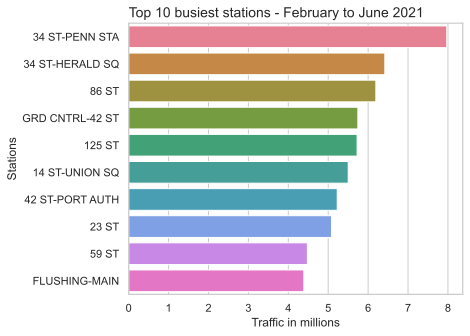

In [269]:
plt.figure(figsize=(6,5))
plt.title('Top 10 busiest stations - February to June 2021',fontsize = 14,loc='left');
sns.set(style="whitegrid", color_codes=True);
ax = sns.barplot(data = s_total[:10], y = s_total.STATION[:10], x = s_total.Cumulative_Traffic[:10], palette='husl')
ax.set(xlabel="Traffic in millions", ylabel = 'Stations')
ax.set_xticklabels(['0','1' ,'2','3','4','5','6', '7', '8']);

plt.show()

# Here I have to decide if I'm gonna go with the MTA data or if I would base my criteria to study the study in other factors. 

## First approach will be to go just with the MTA data to at least evaluate two of the alternatives and develop a system to be able to reapply to future stations if they come to my attention due to the use of external data like demographics or economic factors. 

# 34 ST Penn-Station

Here, we are seeing the individual turnstiles with the highest numbers of daily entries. 

In [ ]:
(t_daily[(t_daily.STATION=='34 ST-PENN STA')]\
 .sort_values(by='Flow', ascending = False,  inplace=False)).head(5)

Another approach may be getting the cummulative number of entries for specific turnstiles. 

In [201]:
t_cumulative = t_daily.groupby(["t_unique", 'STATION'])['Flow'].sum().reset_index()
t_cumulative[t_cumulative.STATION == '34 ST-PENN STA']\
.sort_values(by='Flow', ascending = False,  inplace=False)\
.head(3)

,t_unique,STATION,Flow
3367,R138 R293 00-03-04 34 ST-PENN STA,34 ST-PENN STA,310760
1333,N067 R012 00-05-00 34 ST-PENN STA,34 ST-PENN STA,237265
3352,R138 R293 00-00-00 34 ST-PENN STA,34 ST-PENN STA,192075


After evaluating some of the values, we determined that the busiest control area and unit are:
R138 R293

With this information, we can find which are the busiest entries, exits for this specific location

In [371]:
df[df.t_unique == 'R138 R293 00-03-04 34 ST-PENN STA']\
.sort_values(by='EN_DIFF', ascending = False,  inplace=False)\
.head(3)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,t_unique,DT,EN_DIFF,EX_DIFF
139260,R138,R293,00-03-04,34 ST-PENN STA,123ACE,IRT,05/27/2021,18:00:00,REGULAR,1041924,3183374,R138 R293 00-03-04 34 ST-PENN STA,2021-05-27 18:00:00,245.0,1131.0
139254,R138,R293,00-03-04,34 ST-PENN STA,123ACE,IRT,05/26/2021,18:00:00,REGULAR,1041267,3180133,R138 R293 00-03-04 34 ST-PENN STA,2021-05-26 18:00:00,218.0,1172.0
139248,R138,R293,00-03-04,34 ST-PENN STA,123ACE,IRT,05/25/2021,18:00:00,REGULAR,1040634,3176859,R138 R293 00-03-04 34 ST-PENN STA,2021-05-25 18:00:00,212.0,1116.0


In [370]:
df[df.t_unique == 'N067 R012 00-05-00 34 ST-PENN STA']\
.sort_values(by='EN_DIFF', ascending = False,  inplace=False)\
.head(3)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,t_unique,DT,EN_DIFF,EX_DIFF
55649,N067,R012,00-05-00,34 ST-PENN STA,ACE,IND,05/24/2021,12:00:00,REGULAR,447444,3670860,N067 R012 00-05-00 34 ST-PENN STA,2021-05-24 12:00:00,86.0,689.0
3401044,N067,R012,00-05-00,34 ST-PENN STA,ACE,IND,01/31/2021,19:00:00,REGULAR,433217,3441338,N067 R012 00-05-00 34 ST-PENN STA,2021-01-31 19:00:00,71.0,329.0
3401038,N067,R012,00-05-00,34 ST-PENN STA,ACE,IND,01/30/2021,19:00:00,REGULAR,433006,3440153,N067 R012 00-05-00 34 ST-PENN STA,2021-01-30 19:00:00,66.0,396.0


# Now, gonna focus on study the Turnstile R138 293 00-03-04 from Penn Station

In [ ]:
R138turnstile = t_daily[t_daily.t_unique== 'R138 R293 00-03-04 34 ST-PENN STA']
R138turnstile.head(3)

From here, we are gonna graph now in function of the day of the week

In [ ]:
R138turnstile['Day_of_week'] = pd.to_datetime(R138turnstile['DATE']).dt.day_name()

In [267]:
R138turnstile.head(7)

t_unique        DATE         STATION ENTRIES  \
                                                                        first   
396541  R138 R293 00-03-04 34 ST-PENN STA  01/30/2021  34 ST-PENN STA  995473   
396542  R138 R293 00-03-04 34 ST-PENN STA  01/31/2021  34 ST-PENN STA  995473   
396543  R138 R293 00-03-04 34 ST-PENN STA  02/01/2021  34 ST-PENN STA  995473   
396544  R138 R293 00-03-04 34 ST-PENN STA  02/02/2021  34 ST-PENN STA  995473   
396545  R138 R293 00-03-04 34 ST-PENN STA  02/03/2021  34 ST-PENN STA  995473   
396546  R138 R293 00-03-04 34 ST-PENN STA  02/04/2021  34 ST-PENN STA  995777   
396547  R138 R293 00-03-04 34 ST-PENN STA  02/05/2021  34 ST-PENN STA  996202   

                  EXITS          daily_d daily_ex  Flow Day_of_week  
          last    first     last                                     
396541  995473  2904412  2905713       0     1301  1301    Saturday  
396542  995473  2905872  2906865       0      993   993      Sunday  
396543  995473  2906992  2907748       0      756   756      Monday  
396544  995473  2907798  2908975       0     1177  1177     Tuesday  
396545  995755  2909032  2911100     282     2068  2350   Wednesday  
396546  996186  2911228  2913556     409     2328  2737    Thursday  
396547  996574  2913695  2916004     372     2309  2681      Friday

/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


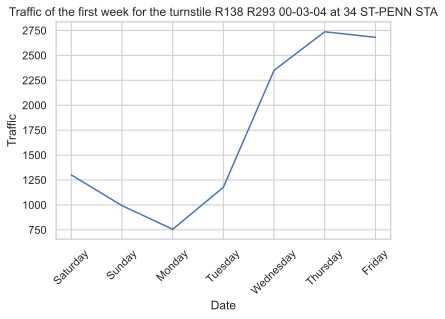

In [268]:
plt.figure(figsize=(6,4));
sns.lineplot(R138turnstile['Day_of_week'][0:7], R138turnstile['Flow'][0:7])
plt.ylabel('Traffic')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Traffic of the first week for the turnstile R138 R293 00-03-04 at 34 ST-PENN STA');

Now focusing on a more generalized approach of the weekdays, in order to find what are the days with the highest traffic. 

In [256]:
R138Days = R138turnstile.groupby(['Day_of_week'])['Flow'].sum()\
.reindex(cats)
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
R138Days

Day_of_week
Monday       47480
Tuesday      50645
Wednesday    51493
Thursday     52054
Friday       52879
Saturday     32479
Sunday       23730
Name: Flow, dtype: int64

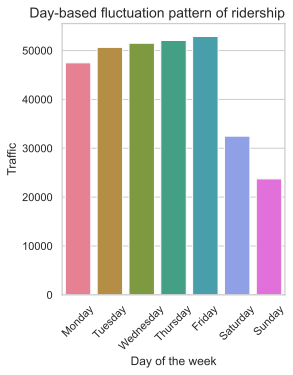

In [534]:
plt.figure(figsize=(4,5))
plt.title('Day-based fluctuation pattern of ridership',fontsize = 14,loc='right');
sns.set(style="whitegrid", color_codes=True);
ax = sns.barplot(data = R138Days[:6], y = R138Days.values , x = R138Days.index, palette='husl')
ax.set(xlabel="Day of the week", ylabel = 'Traffic')
plt.xticks(rotation=45)
plt.show()

# We have determined the busiest days of the week

## Now, let's figure out what times of the day are the busiest

In [ ]:
Hourly138 = df[df.t_unique == 'R138 R293 00-03-04 34 ST-PENN STA']\
.sort_values(by='EN_DIFF', ascending = False, inplace=False).copy(deep=True)

In [ ]:
Hourly138.head(1)

In [354]:
Hourly138['tod'] = pd.cut(pd.to_datetime(Hourly138.TIME).dt.hour,
       bins=[0, 6, 12, 18, 24],
       labels=['night', 'morning', 'afternoon', 'evening'],
       right=False,
       include_lowest=True)

#We will be considering the following: Morning from 6 to 12, Afternoon from 6 to 18, Evening from 18 to 24.  

In [355]:
Hourly138.sample(3)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,t_unique,DT,EN_DIFF,EX_DIFF,tod
2022482,R138,R293,00-03-04,34 ST-PENN STA,123ACE,IRT,03/20/2021,18:00:00,REGULAR,1011897,3010395,R138 R293 00-03-04 34 ST-PENN STA,2021-03-20 18:00:00,77.0,564.0,evening
1184685,R138,R293,00-03-04,34 ST-PENN STA,123ACE,IRT,04/17/2021,18:00:00,REGULAR,1023306,3076440,R138 R293 00-03-04 34 ST-PENN STA,2021-04-17 18:00:00,167.0,566.0,evening
2438907,R138,R293,00-03-04,34 ST-PENN STA,123ACE,IRT,03/11/2021,05:00:00,REGULAR,1008295,2987941,R138 R293 00-03-04 34 ST-PENN STA,2021-03-11 05:00:00,0.0,6.0,night


In [330]:
Hourly138EN = Hourly138.groupby('tod')['EN_DIFF'].sum()\
.reindex(cats)
cats = ['night', 'morning', 'afternoon', 'evening']
Hourly138EN

tod
night         3700.0
morning       9836.0
afternoon    11912.0
evening      21737.0
Name: EN_DIFF, dtype: float64

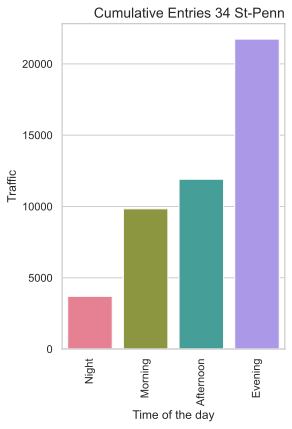

In [430]:
plt.figure(figsize=(4,6))
plt.title('Cumulative Entries 34 St-Penn',fontsize = 14,loc='right');
sns.set(style="whitegrid", color_codes=True);
ax = sns.barplot(data = Hourly138EN , y = Hourly138EN.values , x = Hourly138EN.index , palette='husl')
ax.set(xlabel="Time of the day", ylabel = 'Traffic')
ax.set_xticklabels(['Night', 'Morning', 'Afternoon', 'Evening']);
plt.xticks(rotation=90)
plt.show()

In [365]:
Hourly138.EX_DIFF.describe()

count     717.000000
mean      394.218968
std       293.179780
min         4.000000
25%       129.000000
50%       421.000000
75%       572.000000
max      1212.000000
Name: EX_DIFF, dtype: float64

In [366]:
Hourly138EX = Hourly138.groupby('tod')['EX_DIFF'].sum()\
.reindex(cats)
cats = ['night', 'morning', 'afternoon', 'evening']
Hourly138EX.head()

tod
night         15947.0
morning       61534.0
afternoon     90326.0
evening      114848.0
Name: EX_DIFF, dtype: float64

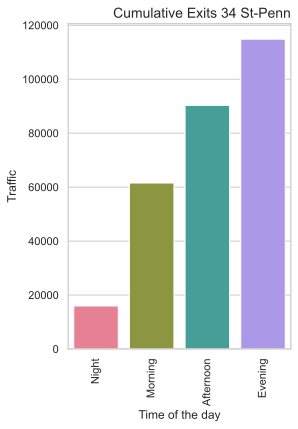

In [431]:
plt.figure(figsize=(4,6))
plt.title('Cumulative Exits 34 St-Penn',fontsize = 14,loc='right');
sns.set(style="whitegrid", color_codes=True);
ax = sns.barplot(data = Hourly138EX , y = Hourly138EX.values , x = Hourly138EX.index , palette='husl')
ax.set(xlabel="Time of the day", ylabel = 'Traffic')
ax.set_xticklabels(['Night', 'Morning', 'Afternoon', 'Evening']);
plt.xticks(rotation=90)
plt.show()

hourlynew = Hourly138.groupby(['t_unique','DATE','STATION'], as_index=False).agg({'ENTRIES': ['first', 'last'],'EXITS': ['first','last']})
#hourlynew['daily_d'] = abs(hourlynew['ENTRIES']['last'] - hourlynew['ENTRIES']['first'])
#hourlynew['daily_ex'] = abs(hourlynew['EXITS']['last'] - hourlynew['EXITS']['first'])

hourlynew['daily_d'] = hourlynew['daily_d'].apply(lambda x : x if 0< x < 4000 else 0)
hourlynew['daily_ex'] = hourlynew['daily_ex'].apply(lambda x : x if 0< x < 5000 else 0)

These turnstiles are in the 7av entry of 34 ST Penn Station. 

 # 34 ST Herald Square

In [444]:
(t_daily[(t_daily.STATION=='34 ST-HERALD SQ')]\
 .sort_values(by='Flow', ascending = False,  inplace=False)).head(5)

t_unique        DATE          STATION  \
                                                                          
286597  N506 R022 00-05-05 34 ST-HERALD SQ  05/21/2021  34 ST-HERALD SQ   
286602  N506 R022 00-05-05 34 ST-HERALD SQ  05/26/2021  34 ST-HERALD SQ   
286603  N506 R022 00-05-05 34 ST-HERALD SQ  05/27/2021  34 ST-HERALD SQ   
286604  N506 R022 00-05-05 34 ST-HERALD SQ  05/28/2021  34 ST-HERALD SQ   
286596  N506 R022 00-05-05 34 ST-HERALD SQ  05/20/2021  34 ST-HERALD SQ   

        ENTRIES             EXITS          daily_d daily_ex  Flow  
          first     last    first     last                         
286597  2381500  2383027  2459025  2461750    1527     2725  4252  
286602  2389079  2390482  2472462  2475231    1403     2769  4172  
286603  2390750  2392208  2475472  2478159    1458     2687  4145  
286604  2392439  2393866  2478438  2481154    1427     2716  4143  
286596  2379823  2381296  2456128  2458737    1473     2609  4082

In [445]:
R022turnstile = t_daily[t_daily.t_unique== 'N506 R022 00-05-05 34 ST-HERALD SQ']
R022turnstile.head(3)

t_unique        DATE          STATION  \
                                                                          
286486  N506 R022 00-05-05 34 ST-HERALD SQ  01/30/2021  34 ST-HERALD SQ   
286487  N506 R022 00-05-05 34 ST-HERALD SQ  01/31/2021  34 ST-HERALD SQ   
286488  N506 R022 00-05-05 34 ST-HERALD SQ  02/01/2021  34 ST-HERALD SQ   

        ENTRIES             EXITS          daily_d daily_ex  Flow  
          first     last    first     last                         
286486  2249075  2249791  2213739  2215443     716     1704  2420  
286487  2249809  2250508  2215478  2216751     699     1273  1972  
286488  2250526  2250759  2216780  2217272     233      492   725

In [446]:
R022turnstile['Day_of_week'] = pd.to_datetime(R022turnstile['DATE']).dt.day_name()

<ipython-input-446-9b94717a9a42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R022turnstile['Day_of_week'] = pd.to_datetime(R022turnstile['DATE']).dt.day_name()


In [447]:
R022Days = R022turnstile.groupby(['Day_of_week'])['Flow'].sum()\
.reindex(cats)
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
R022Days

Day_of_week
Monday       52811
Tuesday      56641
Wednesday    57992
Thursday     58393
Friday       62312
Saturday     52623
Sunday       39856
Name: Flow, dtype: int64

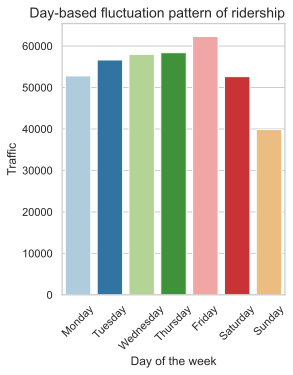

In [535]:
plt.figure(figsize=(4,5))
plt.title('Day-based fluctuation pattern of ridership',fontsize = 14,loc='right');
sns.set(style="whitegrid", color_codes=True);
ax = sns.barplot(data = R022Days[:6], y = R022Days.values , x = R022Days.index, palette='Paired')
ax.set(xlabel="Day of the week", ylabel = 'Traffic')
plt.xticks(rotation=45)
plt.show()

In [453]:
Hourly022 = df[df.t_unique == 'N506 R022 00-05-05 34 ST-HERALD SQ']\
.sort_values(by='EN_DIFF', ascending = False, inplace=False).copy(deep=True)

In [454]:
Hourly022['tod'] = pd.cut(pd.to_datetime(Hourly022.TIME).dt.hour,
       bins=[0, 6, 12, 18, 24],
       labels=['night', 'morning', 'afternoon', 'evening'],
       right=False,
       include_lowest=True)



In [455]:
Hourly022EN = Hourly022.groupby('tod')['EN_DIFF'].sum()\
.reindex(cats)
cats = ['night', 'morning', 'afternoon', 'evening']
Hourly022EN

tod
night        15768.0
morning      23425.0
afternoon    50638.0
evening      54979.0
Name: EN_DIFF, dtype: float64

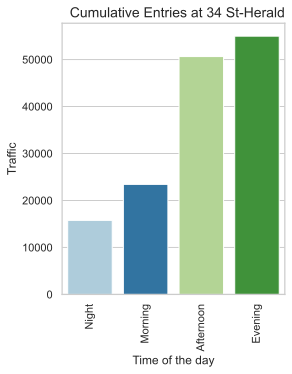

In [461]:
plt.figure(figsize=(4,5))
plt.title('Cumulative Entries at 34 St-Herald',fontsize = 14,loc='right');
sns.set(style="whitegrid", color_codes=True);
ax = sns.barplot(data = Hourly022EN[:3] , y = Hourly022EN.values , x = Hourly022EN.index.str.capitalize() , palette='Paired')
ax.set(xlabel="Time of the day", ylabel = 'Traffic')
#ax.set_xticklabels(['Night', 'Morning', 'Afternoon', 'Evening']);
plt.xticks(rotation=90)
plt.show()

In [462]:
Hourly022EX = Hourly022.groupby('tod')['EX_DIFF'].sum()\
.reindex(cats)
cats = ['night', 'morning', 'afternoon', 'evening']
Hourly022EX.index

Index(['night', 'morning', 'afternoon', 'evening'], dtype='object', name='tod')

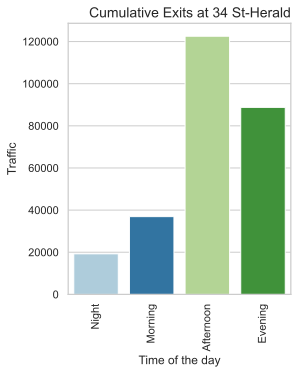

In [464]:
plt.figure(figsize=(4,5))
plt.title('Cumulative Exits at 34 St-Herald',fontsize = 14,loc='right');
sns.set(style="whitegrid", color_codes=True);
ax = sns.barplot(data = Hourly022EX[:3] , y = Hourly022EX.values, x= Hourly022EX.index.str.capitalize() , palette='Paired')
ax.set(xlabel="Time of the day", ylabel = 'Traffic')
#ax.set_xticklabels(['Night', 'Morning', 'Evening' ,'Afternoon']);
plt.xticks(rotation=90)
plt.show()

# Now I'll be studying the stations in the zip code 10007

In [503]:
chstr = df[df.STATION == 'CHAMBERS ST'].copy(deep=True)

In [504]:
chstr.shape

(39235, 15)

In [505]:
chstr.LINENAME.unique()

array(['JZ456', 'ACE23', '123'], dtype=object)

In [506]:
#We see there are three different stations

In [507]:
tch= chstr.groupby(['t_unique', 'DATE','STATION','LINENAME'], as_index=False).agg({'ENTRIES': ['first', 'last'],'EXITS': ['first','last']})
tch['daily_d'] = abs(tch['ENTRIES']['last'] - tch['ENTRIES']['first'])
tch['daily_ex'] = abs(tch['EXITS']['last'] - tch['EXITS']['first'])

In [508]:
tch

t_unique        DATE      STATION LINENAME  \
                                                                         
0     A069 R044 01-00-00 CHAMBERS ST  01/30/2021  CHAMBERS ST    JZ456   
1     A069 R044 01-00-00 CHAMBERS ST  01/31/2021  CHAMBERS ST    JZ456   
2     A069 R044 01-00-00 CHAMBERS ST  02/01/2021  CHAMBERS ST    JZ456   
3     A069 R044 01-00-00 CHAMBERS ST  02/02/2021  CHAMBERS ST    JZ456   
4     A069 R044 01-00-00 CHAMBERS ST  02/03/2021  CHAMBERS ST    JZ456   
...                              ...         ...          ...      ...   
6540  R116 R030 00-06-03 CHAMBERS ST  05/24/2021  CHAMBERS ST      123   
6541  R116 R030 00-06-03 CHAMBERS ST  05/25/2021  CHAMBERS ST      123   
6542  R116 R030 00-06-03 CHAMBERS ST  05/26/2021  CHAMBERS ST      123   
6543  R116 R030 00-06-03 CHAMBERS ST  05/27/2021  CHAMBERS ST      123   
6544  R116 R030 00-06-03 CHAMBERS ST  05/28/2021  CHAMBERS ST      123   

       ENTRIES              EXITS          daily_d daily_ex  
         first      last    first     last                   
0       182992    183016  1045480  1045944      24      464  
1       183018    183032  1045958  1046283      14      325  
2       183033    183081  1046294  1046704      48      410  
3       183084    183157  1046714  1047287      73      573  
4       183158    183358  1047299  1048370     200     1071  
...        ...       ...      ...      ...     ...      ...  
6540  14711637  14712473  7618123  7618684     836      561  
6541  14712593  14713439  7618711  7619380     846      669  
6542  14713594  14714480  7619422  7620049     886      627  
6543  14714602  14715470  7620091  7620730     868      639  
6544  14715627  14716400  7620776  7621349     773      573  

[6545 rows x 10 columns]

In [509]:
tch['daily_d'] = tch['daily_d'].apply(lambda x : x if 0< x < 4000 else 0) 
tch['daily_ex'] = tch['daily_ex'].apply(lambda x : x if 0< x < 5000 else 0) 

In [510]:
Variable = 'daily_d'

In [511]:
ch_dailyEN = tch.groupby(["STATION", "DATE", 'LINENAME'])['daily_d'].sum().reset_index()
ch_dailyEN

,STATION,DATE,LINENAME,daily_d
0,CHAMBERS ST,01/30/2021,123,1163
1,CHAMBERS ST,01/30/2021,ACE23,2004
2,CHAMBERS ST,01/30/2021,JZ456,490
3,CHAMBERS ST,01/31/2021,123,1057
4,CHAMBERS ST,01/31/2021,ACE23,1465
...,...,...,...,...
352,CHAMBERS ST,05/27/2021,ACE23,5752
353,CHAMBERS ST,05/27/2021,JZ456,2854
354,CHAMBERS ST,05/28/2021,123,3404
355,CHAMBERS ST,05/28/2021,ACE23,5090


In [512]:
ch_dailyEN.sort_values(by= Variable, ascending = False)

,STATION,DATE,LINENAME,daily_d
346,CHAMBERS ST,05/25/2021,ACE23,5768
352,CHAMBERS ST,05/27/2021,ACE23,5752
349,CHAMBERS ST,05/26/2021,ACE23,5709
331,CHAMBERS ST,05/20/2021,ACE23,5563
328,CHAMBERS ST,05/19/2021,ACE23,5504
...,...,...,...,...
110,CHAMBERS ST,03/07/2021,JZ456,486
215,CHAMBERS ST,04/11/2021,JZ456,469
89,CHAMBERS ST,02/28/2021,JZ456,436
26,CHAMBERS ST,02/07/2021,JZ456,433


In [518]:
ch_totalEN = ch_dailyEN.groupby(['STATION', 'LINENAME'])[Variable].sum().reset_index().sort_values(Variable, ascending=False)
ch_totalEN.rename(columns = {'daily_d':'Cumulative_Entry_Traffic'}, inplace=True)
ch_totalEN

,STATION,LINENAME,Cumulative_Entry_Traffic
1,CHAMBERS ST,ACE23,451127
0,CHAMBERS ST,123,309370
2,CHAMBERS ST,JZ456,214732


In [513]:
# We will focus on Chambers ST Linename ACE23 for being the one with higher traffic for entries. 

In [514]:
tch.shape

(6545, 10)

In [516]:
tch = tch[tch.LINENAME == 'ACE23']

In [517]:
tch.shape

(2975, 10)

In [520]:
tch.head(5)

t_unique        DATE      STATION LINENAME  \
                                                                         
1666  N091 R029 02-00-00 CHAMBERS ST  01/30/2021  CHAMBERS ST    ACE23   
1667  N091 R029 02-00-00 CHAMBERS ST  01/31/2021  CHAMBERS ST    ACE23   
1668  N091 R029 02-00-00 CHAMBERS ST  02/01/2021  CHAMBERS ST    ACE23   
1669  N091 R029 02-00-00 CHAMBERS ST  02/02/2021  CHAMBERS ST    ACE23   
1670  N091 R029 02-00-00 CHAMBERS ST  02/03/2021  CHAMBERS ST    ACE23   

         ENTRIES                  EXITS            daily_d daily_ex  
           first        last      first       last                   
1666  1159136491  1159136596  352820672  352820716     105       44  
1667  1159136602  1159136696  352820719  352820743      94       24  
1668  1159136697  1159136799  352820745  352820786     102       41  
1669  1159136801  1159136984  352820788  352820833     183       45  
1670  1159136989  1159137403  352820834  352820930     414       96

In [521]:
Hch = df[(df.STATION == 'CHAMBERS ST') & (df.LINENAME =='ACE23')]\
.sort_values(by='EN_DIFF', ascending = False, inplace=False).copy(deep=True)

In [522]:
Hch['tod'] = pd.cut(pd.to_datetime(Hch.TIME).dt.hour,
       bins=[0, 6, 12, 18, 24],
       labels=['night', 'morning', 'afternoon', 'evening'],
       right=False,
       include_lowest=True)



In [523]:
Hch = Hch.groupby('tod')['EN_DIFF'].sum()\
.reindex(cats)
cats = ['night', 'morning', 'afternoon', 'evening']
Hch

tod
night         51152.0
morning       44502.0
afternoon    169727.0
evening      232628.0
Name: EN_DIFF, dtype: float64

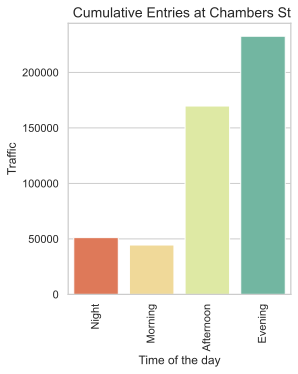

In [524]:
plt.figure(figsize=(4,5))
plt.title('Cumulative Entries at Chambers St',fontsize = 14,loc='right');
sns.set(style="whitegrid", color_codes=True);
ax = sns.barplot(data = Hch[:4] , y = Hch.values , x = Hch.index.str.capitalize() , palette='Spectral')
ax.set(xlabel="Time of the day", ylabel = 'Traffic')
#ax.set_xticklabels(['Night', 'Morning', 'Afternoon', 'Evening']);
plt.xticks(rotation=90)
plt.show()

In [525]:
HchEx = df[(df.STATION == 'CHAMBERS ST') & (df.LINENAME =='ACE23')]\
.sort_values(by='EX_DIFF', ascending = False, inplace=False).copy(deep=True)

In [526]:
HchEx['tod'] = pd.cut(pd.to_datetime(HchEx.TIME).dt.hour,
       bins=[0, 6, 12, 18, 24],
       labels=['night', 'morning', 'afternoon', 'evening'],
       right=False,
       include_lowest=True)



In [527]:
HchEx = HchEx.groupby('tod')['EX_DIFF'].sum()\
.reindex(cats)
cats = ['night', 'morning', 'afternoon', 'evening']
HchEx

tod
night         32083.0
morning      114771.0
afternoon    200206.0
evening       92234.0
Name: EX_DIFF, dtype: float64

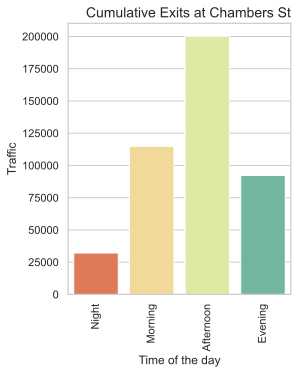

In [531]:
plt.figure(figsize=(4,5))
plt.title('Cumulative Exits at Chambers St',fontsize = 14,loc='right');
sns.set(style="whitegrid", color_codes=True);
ax = sns.barplot(data = HchEx[:4] , y = HchEx.values , x = HchEx.index.str.capitalize() , palette='Spectral')
ax.set(xlabel="Time of the day", ylabel = 'Traffic')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# After taking into consideration that some stations where wrongly grouped. I won't pursue this path. 

In [101]:
t_daily2 = df.copy(deep=True)

In [102]:
t_daily2.head(6)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,t_unique,DT,EN_DIFF,EX_DIFF
3345350,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,07:00:00,REGULAR,7524543,2564703,A002 R051 02-00-00 59 ST,2021-01-30 07:00:00,4.0,10.0
3345351,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,11:00:00,REGULAR,7524566,2564755,A002 R051 02-00-00 59 ST,2021-01-30 11:00:00,23.0,52.0
3345352,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,15:00:00,RECOVR AUD,7524643,2564793,A002 R051 02-00-00 59 ST,2021-01-30 15:00:00,77.0,38.0
3345353,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,19:00:00,REGULAR,7524739,2564811,A002 R051 02-00-00 59 ST,2021-01-30 19:00:00,96.0,18.0
3345354,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,23:00:00,REGULAR,7524821,2564823,A002 R051 02-00-00 59 ST,2021-01-30 23:00:00,82.0,12.0
3345355,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/31/2021,03:00:00,REGULAR,7524826,2564825,A002 R051 02-00-00 59 ST,2021-01-31 03:00:00,5.0,2.0


Dropping some columns to improve readibility. 

In [103]:
t_daily2.drop(['DESC','EXITS', 'EX_DIFF'] , axis=1, inplace=True, errors = 'ignore')

In [104]:
len(t_daily2.LINENAME.unique())

114

In [75]:
y = 'NQR456W'
x = ''.join(sorted(y))
print(x)

456NQRW


In [106]:
t_daily2['LINENAME'] = t_daily2.LINENAME.apply(lambda x: ''.join(sorted(x)))

In [107]:
len(t_daily2.LINENAME.unique())

95

In [78]:
y = '456NQRW'
x = ''.join(sorted(y))
print(x)

456NQRW


# This is really important, here is where I calculate the difference in values using the last and first of the values for each turnstile, for each Date and Station. 

In [108]:
t_daily2 = df.groupby(['t_unique', 'DATE','STATION', "LINENAME"], as_index=False).agg({'ENTRIES': ['first', 'last']})
t_daily2['daily_d'] = abs(t_daily2['ENTRIES']['last'] - t_daily2['ENTRIES']['first'])

In [109]:
t_daily2.head(6)

t_unique        DATE STATION LINENAME  ENTRIES           \
                                                            first     last   
0  A002 R051 02-00-00 59 ST  01/30/2021   59 ST  NQR456W  7524543  7524821   
1  A002 R051 02-00-00 59 ST  01/31/2021   59 ST  NQR456W  7524826  7525089   
2  A002 R051 02-00-00 59 ST  02/01/2021   59 ST  NQR456W  7525092  7525260   
3  A002 R051 02-00-00 59 ST  02/02/2021   59 ST  NQR456W  7525267  7525600   
4  A002 R051 02-00-00 59 ST  02/03/2021   59 ST  NQR456W  7525606  7526164   
5  A002 R051 02-00-00 59 ST  02/04/2021   59 ST  NQR456W  7526176  7526683   

  daily_d  
           
0     278  
1     263  
2     168  
3     333  
4     558  
5     507

In [110]:
t_daily2['LINENAME'] = t_daily2.LINENAME.apply(lambda x: ''.join(sorted(x)))

In [111]:
t_daily2.daily_d.describe()

count    5.940650e+05
mean     2.355387e+04
std      5.338048e+06
min      0.000000e+00
25%      5.500000e+01
50%      1.940000e+02
75%      4.060000e+02
max      2.139010e+09
Name: daily_d, dtype: float64

In [112]:
t_daily2['daily_d'] = t_daily2['daily_d'].apply(lambda x : x if 0< x < 17280 else 0)  #The value of 6000 was hand-picked. 

In [113]:
(t_daily2.sort_values(by='daily_d', ascending = False,  inplace=False)).head(10)

t_unique        DATE          STATION  \
                                                                          
345396      PTH07 R550 00-00-04 CITY / BUS  04/28/2021       CITY / BUS   
364523      PTH21 R540 01-00-00 PATH WTC 2  05/04/2021       PATH WTC 2   
408450    R160 R164 02-03-00 66 ST-LINCOLN  02/22/2021    66 ST-LINCOLN   
462507  R240 R047 00-03-00 GRD CNTRL-42 ST  04/11/2021  GRD CNTRL-42 ST   
367976    PTH22 R540 00-03-00 PATH NEW WTC  05/19/2021     PATH NEW WTC   
341306    PTH04 R551 00-04-06 GROVE STREET  03/11/2021     GROVE STREET   
337545  PTH03 R552 00-01-01 JOURNAL SQUARE  02/24/2021   JOURNAL SQUARE   
55431        B032 R264 00-00-01 OCEAN PKWY  04/26/2021       OCEAN PKWY   
341061    PTH04 R551 00-04-04 GROVE STREET  02/17/2021     GROVE STREET   
90761              H001 R175 00-06-02 8 AV  02/28/2021             8 AV   

       LINENAME   ENTRIES           daily_d  
                    first      last          
345396        1     17441       269   17172  
364523        1     16707       174   16533  
408450        1  15427068  15441490   14422  
462507    4567S     14271        83   14188  
367976        1     12187       212   11975  
341306        1     10928       204   10724  
337545        1      9272       304    8968  
55431         Q      9086       120    8966  
341061        1      9475       521    8954  
90761      ACEL    270875    262166    8709

In [114]:
t_daily2.STATION.nunique()

379

Now, I'll focus on grouping the number of daily entries by stations.

In [115]:
s_daily2 = t_daily2.groupby(["LINENAME","STATION", "DATE"])['daily_d'].sum().reset_index()
s_daily2.head()

,LINENAME,STATION,DATE,daily_d
0,1,103 ST,01/30/2021,1815
1,1,103 ST,01/31/2021,1330
2,1,103 ST,02/01/2021,1374
3,1,103 ST,02/02/2021,1723
4,1,103 ST,02/03/2021,3192
